<h1>İş Başvurularının Değerlendirilmesi </h1>



Kütüphaneleri import edip, verilerimi yüklüyorum.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn import metrics
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.tree import export_graphviz

df = pd.read_csv("IseAlimDataSet.csv")

Modeli oluşturmak için sklearn içerisinden DecisionTreeClassifier<br>
Model Başarı oranını öğrenemk için train_test_split<br>
Accuracy oranını hesaplamak için metrics<br>
Sklearn içerisindeki tree,matplotlib ve dtreeviz ile görselleştirme yapılacak<br>

In [2]:
df

,Deneyim Yili,SuanCalisiyorMu,Eski Calistigi Firmalar,Egitim Seviyesi,Top10 Universite,StajiBizdeMiYapti,IseAlindi
0,11,Y,4,L,N,N,Y
1,0,N,0,D,Y,Y,Y
2,5,Y,2,YL,N,Y,Y
3,3,N,1,L,N,Y,Y
4,0,N,0,L,N,N,N
5,14,Y,7,L,N,N,Y
6,1,N,0,L,N,N,N
7,1,N,1,D,Y,N,N
8,4,Y,1,L,N,Y,Y
9,0,N,0,D,Y,N,Y


Scikit-learn kütüphanesindeki decision tree'lerin düzgün çalışması için her şeyi rakamsal olarak yazmamız gerekli. Veri setimizdeki tüm <b>Y (yes) ve N (no)</b> değerlerinin <b>0</b> ve <b>1</b> olarak düzenliyorum. Aynı sebeple eğitim seviyesini de; <br>
<b>L: 0   (Lisans)</b><br>
<b>YL: 1  (Yüksek Lisans)</b><br>
<b>D: 2   (Doktora)</b><br>
olarak güncelliyorum.<br>
map() kullanarak boş hücreler veya geçersiz değer girilen hücreler NaN ile doldurulacaktır.

In [3]:
d = {'Y': 1, 'N': 0}
df['IseAlindi'] = df['IseAlindi'].map(d)
df['SuanCalisiyorMu'] = df['SuanCalisiyorMu'].map(d)
df['Top10 Universite'] = df['Top10 Universite'].map(d)
df['StajiBizdeMiYapti'] = df['StajiBizdeMiYapti'].map(d)

In [4]:
df

,Deneyim Yili,SuanCalisiyorMu,Eski Calistigi Firmalar,Egitim Seviyesi,Top10 Universite,StajiBizdeMiYapti,IseAlindi
0,11,1,4,L,0,0,1
1,0,0,0,D,1,1,1
2,5,1,2,YL,0,1,1
3,3,0,1,L,0,1,1
4,0,0,0,L,0,0,0
5,14,1,7,L,0,0,1
6,1,0,0,L,0,0,0
7,1,0,1,D,1,0,0
8,4,1,1,L,0,1,1
9,0,0,0,D,1,0,1


İlk 5 satır getirildiğinde, gerekli verilerimizin 0 ve 1 olduğunu gördük.<br>
Aynı şekilde <b>Eğitim Seviyesi</b> için de bunu yapmamız gerekiyor.

In [5]:
d_egitim_seviyesi = {'L': 0, 'YL': 1, 'D': 2}
df['Egitim Seviyesi'] = df['Egitim Seviyesi'].map(d_egitim_seviyesi)

In [6]:
df

,Deneyim Yili,SuanCalisiyorMu,Eski Calistigi Firmalar,Egitim Seviyesi,Top10 Universite,StajiBizdeMiYapti,IseAlindi
0,11,1,4,0,0,0,1
1,0,0,0,2,1,1,1
2,5,1,2,1,0,1,1
3,3,0,1,0,0,1,1
4,0,0,0,0,0,0,0
5,14,1,7,0,0,0,1
6,1,0,0,0,0,0,0
7,1,0,1,2,1,0,0
8,4,1,1,0,0,1,1
9,0,0,0,2,1,0,1


Eğitim seviyeleri de 0, 1 ve 2 oldu <br><br><br>
Şimdi Tree modelimi eğitmek için "İşe Alındı" sütununu ayırıp Y sütunu yapıp, geri kalan sütunları da X sütunu yapacağım.<br><br><br>
Verisetinde 55 veri var. Bunun %25'ini test, geri kalanını ise eğitim için ayırdım.

In [7]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [8]:
x.head()

,Deneyim Yili,SuanCalisiyorMu,Eski Calistigi Firmalar,Egitim Seviyesi,Top10 Universite,StajiBizdeMiYapti
0,11,1,4,0,0,0
1,0,0,0,2,1,1
2,5,1,2,1,0,1
3,3,0,1,0,0,1
4,0,0,0,0,0,0


x, drop edilmiş.<br><br><br>
Şimdi Decision Tree'mi oluşturuyorum.

In [9]:
clf = DecisionTreeClassifier()

In [10]:
clf.fit(x,y)

DecisionTreeClassifier()

<br>Ayırdığım test setimi (x_test) kullanarak oluşturduğum model ile tahmin yapacağım ve elde ettiğim set (y_pred) ile hedef değişken (y_test) setimi karşılaştıracağım.

In [11]:
y_pred = clf.predict(x_test)
print(y_pred)

[1 1 0 0 1 1 0 0 0 0 0 1 1 1]


In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[7 0]
 [0 7]]


Matriste görüldüğü gibi 0 adet hatalı sınıflandırma var.<br><br><br><br><br>

In [13]:
dogruluk = metrics.accuracy_score(y_test, y_pred)
dogruluk

1.0

Doğruluk oranının 1 olduğu görünüyor. Yani %100 , hatasız

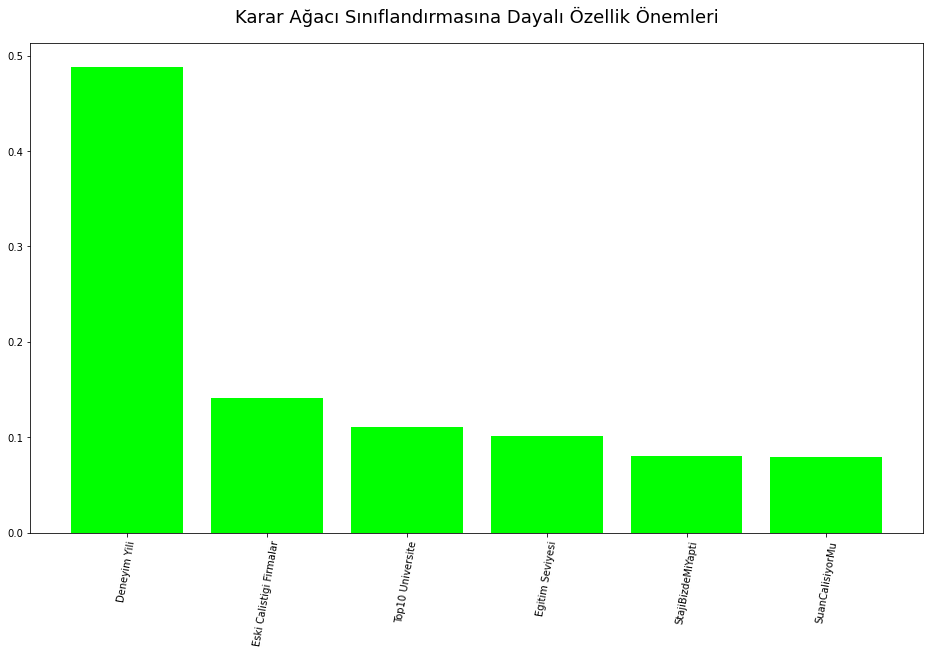

In [14]:
plt.figure(figsize=(16, 9))

from sklearn import ensemble

d_tree2 = DecisionTreeClassifier(max_depth = 8, random_state=42)
d_tree2.fit(x_train, y_train)
ranking = d_tree2.feature_importances_
features = np.argsort(ranking)[::-1][:10]
columns = x.columns

plt.title("Karar Ağacı Sınıflandırmasına Dayalı Özellik Önemleri", y = 1.03, size = 18)
plt.bar(range(len(features)), ranking[features], color="lime", align="center")
plt.xticks(range(len(features)), columns[features], rotation=80)
plt.show()

<h3>Modelin özniteliklerinin önem sıralamasını analiz etme.
<br>
Açık bir şekilde görülüyor ki yapay zeka, Deneyim Yılına önem veriyor.</h3>

In [15]:
# Şimdi tahminleme (prediction) yapıyorum. 

# 5 yıl deneyimli
# Şu an bir yerde çalışan
# Daha önce 3 şirkette çalışmış
# Eğitim seviyesi Lisans
# İlk 10 üniversiteden birinden mezun değil
# Stajını, şu an başvurduğu şirkette yapmamış

print(clf.predict([[5,1,3,0,0,0]]))

[0]


In [16]:
# 2 yıl deneyimli
# Şu an bir yerde çalışmayan
# 7 eski şirkette çalışmış
# Eğitim seviyesi Lisans
# İlk 10 üniversiteden birinden mezun
# Stajını şu an başvurduğu şirkette yapmamış

print(clf.predict([[2,0,7,0,1,0]]))

[0]


In [17]:
# 2 yıl deneyim
# Şu an bir yerde çalışan
# 7 eski şirkette çalışmış
# Eğitim seviyesi Lisans
# İlk 10 üniversiteden birinden mezun değil
# Stajını şu an başvurduğu şirkette yapmış
print(clf.predict([[2,1,7,0,0,1]]))

[0]


In [18]:
# 11 yıl deneyim
# Şu an bir yerde çalışmayan
# 3 eski şirkette çalışmış
# Eğitim Seviyesi Yüksek Lisans
# İlk 10 üniversiteden mezun değil
# Stajını şu an başvurduğu şirkette yapmamış

print(clf.predict([[11,0,3,1,0,0]]))

[1]


In [19]:
# 2 yıl deneyim
# Şu an bir yerde çalışan
# 4 eski şirkette çalışmış
# Eğitim seviyesi Lisans
# İlk 10 üniversiteden mezun
# Stajını şu an başvurduğu şirkette yapmış
print(clf.predict([[2,1,4,0,1,1]]))

[1]


In [20]:
print(clf.predict([[0,0,0,0,0,0]]))

[0]


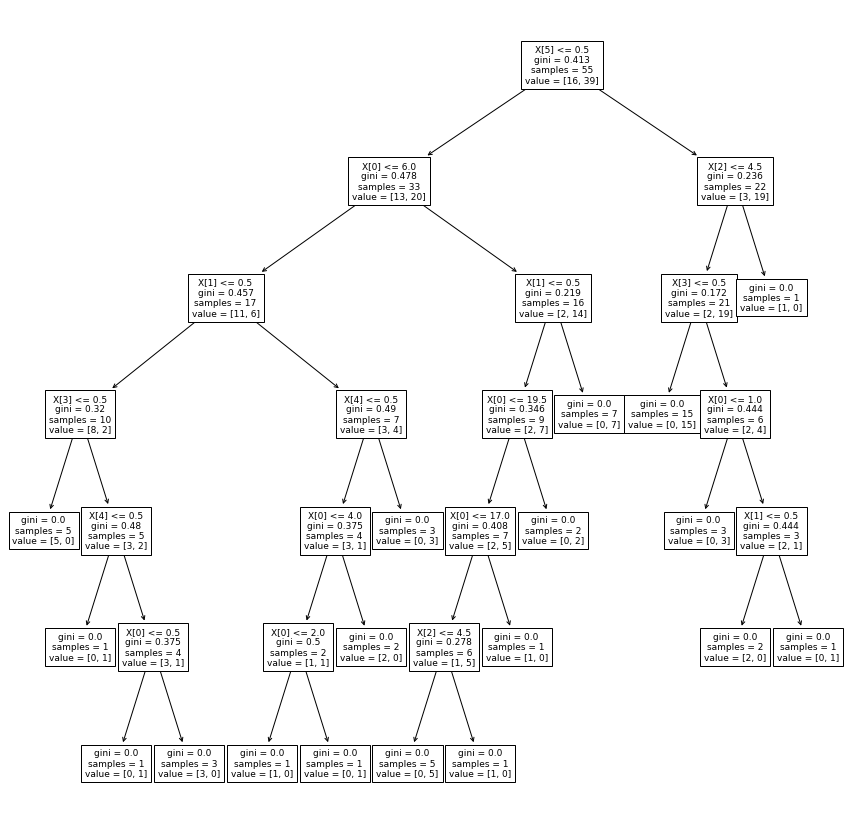

In [21]:
plt.figure(figsize=(15,15))
tree.plot_tree(clf, fontsize=9)
plt.show()